<a href="https://colab.research.google.com/github/jazu1412/CRISP-DM-SEMMA-AND-KDD/blob/main/Suicide_Overview_CRISP_DM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# CRISP-DM Step 1: Business Understanding
# Objective: Analyze suicide rates and their correlations with various factors

# CRISP-DM Step 2: Data Understanding
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [3]:

# Load the dataset
suicide_data = pd.read_csv('master.csv')


In [4]:

# Display basic information about the dataset
print(suicide_data.info())
print(suicide_data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB
None
               year   suicides_no    population  suicides/100k pop  \
count  27820.000000  27820.000000  2.782000e+04       27820.000000  

In [5]:

# CRISP-DM Step 3: Data Preparation
# Clean and preprocess the data
suicide_data['year'] = pd.to_datetime(suicide_data['year'], format='%Y')
suicide_data = suicide_data.dropna()


In [8]:

# Create new features
suicide_data['suicide_per_100k'] = suicide_data['suicides_no'] / suicide_data['population'] * 100000
suicide_data['suicide_per_100k'].head
# Select features for modeling
features = ['year', 'age', 'population', 'gdp_per_capita ($)', 'generation']
features
target = 'suicide_per_100k'
target

X = pd.get_dummies(suicide_data[features], columns=['age', 'generation'])
y = suicide_data[target]


In [15]:
# Convert the 'year' column to an integer representing the year
#X['year'] = X['year'].dt.year # Convert 'year' column in the original X DataFrame to integers
# The line above is not needed and causes the error, since the year column is not
# a datetime anymore. It was converted to datetime in cell 5 and likely converted to
# integer in a previous run.
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# CRISP-DM Step 4: Modeling
# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)
y_pred


array([31.73170531, 10.26729672,  7.04528831, ..., 15.03066903,
        3.59012318,  5.32380894])

In [16]:

# CRISP-DM Step 5: Evaluation
# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")


Mean Squared Error: 188.06410130325025
R-squared Score: 0.3904293632612953


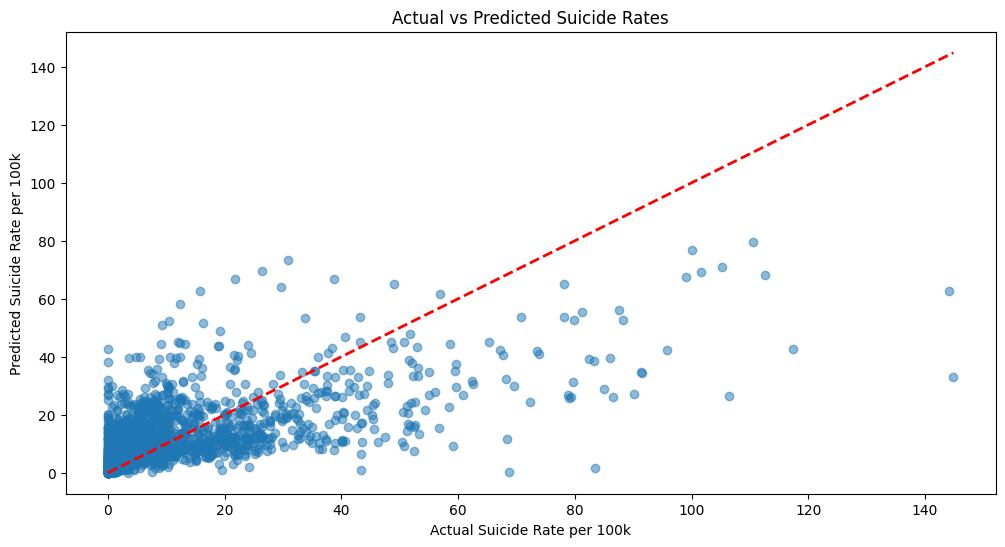

In [17]:

# CRISP-DM Step 6: Deployment
# In this case, we'll create visualizations to deploy our insights

# Plot 1: Actual vs Predicted Suicide Rates
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Suicide Rate per 100k')
plt.ylabel('Predicted Suicide Rate per 100k')
plt.title('Actual vs Predicted Suicide Rates')
plt.show()


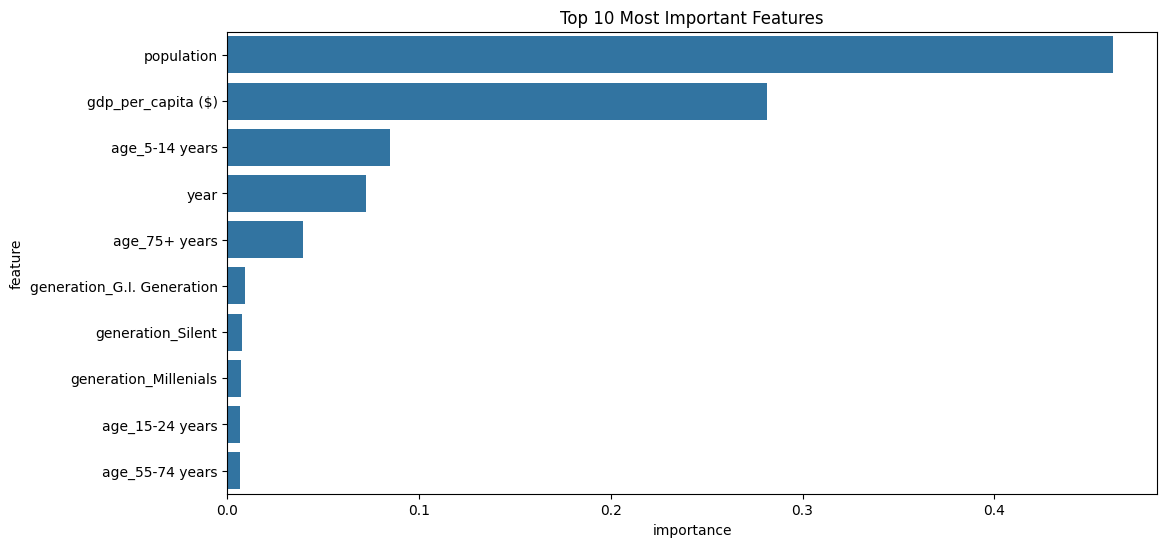

In [18]:

# Plot 2: Feature Importance
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('Top 10 Most Important Features')
plt.show()


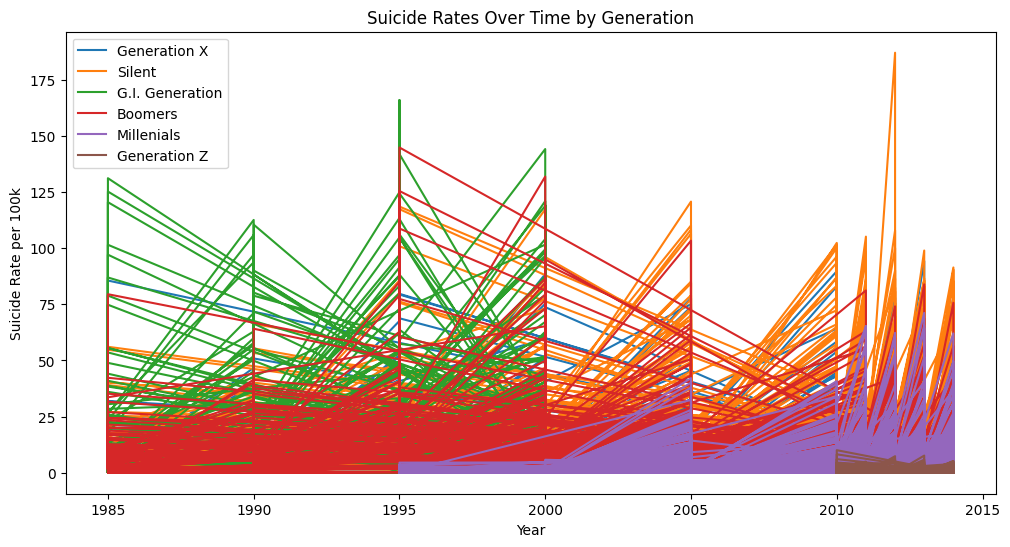

In [19]:

# Plot 3: Suicide Rates Over Time by Generation
plt.figure(figsize=(12, 6))
for generation in suicide_data['generation'].unique():
    gen_data = suicide_data[suicide_data['generation'] == generation]
    plt.plot(gen_data['year'], gen_data['suicide_per_100k'], label=generation)

plt.xlabel('Year')
plt.ylabel('Suicide Rate per 100k')
plt.title('Suicide Rates Over Time by Generation')
plt.legend()
plt.show()


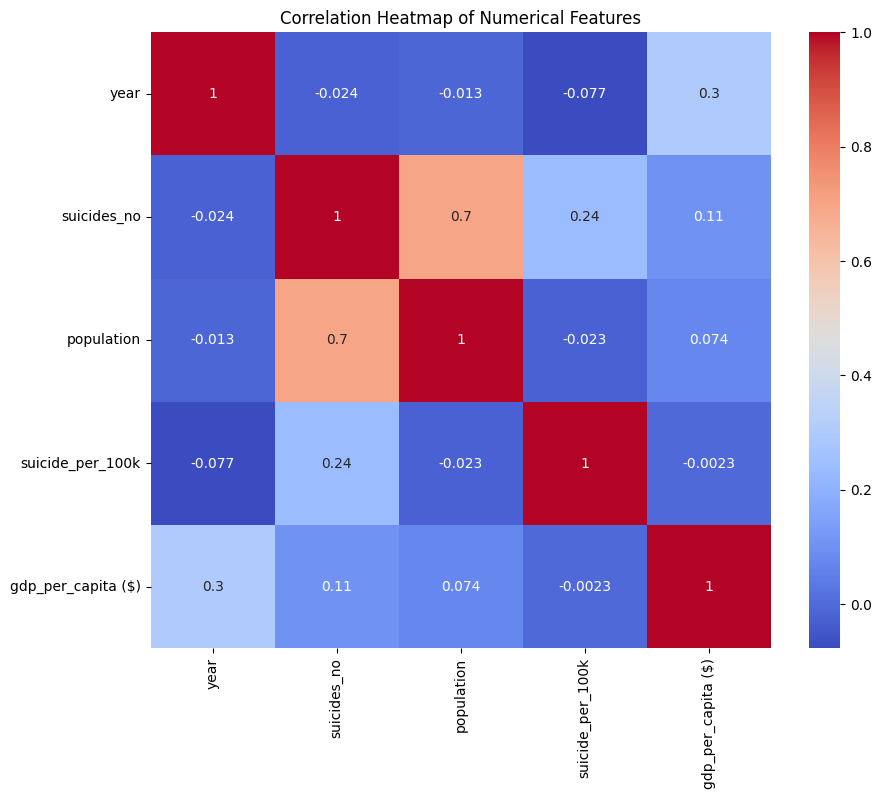

In [21]:
# Plot 4: Correlation Heatmap
correlation_matrix = suicide_data[['year', 'suicides_no', 'population', 'suicide_per_100k', 'gdp_per_capita ($)']].corr() # Removed 'age' column as it is not numerical

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()